In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from nltk.corpus import stopwords
import string
from wordcloud import WordCloud
import pandas as pd

from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

from nltk.tokenize import WhitespaceTokenizer

import plotly.graph_objects as go
import plotly.express as px

warnings.filterwarnings('ignore')

In [9]:
data = pd.read_csv('updated_data_final_cleaned.csv', encoding="utf-8")
print(data.shape)
data.describe()

FileNotFoundError: [Errno 2] No such file or directory: 'updated_data_final_cleaned.csv'

In [10]:
data.info()

NameError: name 'data' is not defined

In [5]:
data[data.isna().any(axis=1) | data.isnull().any(axis=1)]

,instruction,Resume_test,length


In [6]:
data.nunique()

instruction       18
Resume_test    14300
length          8761
dtype: int64

In [12]:
valores_unicos = data.instruction.unique()
valores_unicos

array(['Automation Testing ', 'Blockchain ', 'Data Science ', 'Database ',
       'Designer ', 'DevOps Engineer ', 'DotNet Developer ',
       'ETL Developer ', 'Information Technology ', 'Java Developer ',
       'Network Security Engineer ', 'Project manager ',
       'Python Developer ', 'SAP Developer ', 'Security Analyst ',
       'Testing ', 'Web Designing ', 'Web Developer '], dtype=object)

In [21]:
valores_a_eliminar = [
    'Automation Testing ',
    'Designer ',
    'ETL Developer ',
    'Information Technology ',
    'Project manager ',
    'SAP Developer ',
    'Security Analyst '
]

df = data[~data['instruction'].isin(valores_a_eliminar)]

In [23]:
#imprimimos las etiquetas nuevas que quedaron
df['instruction'] = df['instruction'].str.rstrip()

valores_unicos = df.instruction.unique()
valores_unicos

array(['Blockchain', 'Data Science', 'Database', 'DevOps Engineer',
       'DotNet Developer', 'Java Developer', 'Network Security Engineer',
       'Python Developer', 'Testing', 'Web Designing', 'Web Developer'],
      dtype=object)

In [24]:
df.Resume_test[555]

'Freelance Web Designer Developer Freelance span lWebspan Designerspan lDeveloperspan Arlington TX Recent college graduate with 3 years of experience in web design web content management and digital marketing Im a Communication Technology major seeking to be a part of a challenging environment that utilizes teamwork efforts for researching learning and developing new hightech products in the Dallas Fort Worth area Authorized to work in the US for any employer Work Experience Freelance Web Designer Developer QBs Clean Cut Designs Arlington TX September 2016 to Present Design and develop websites using content management systems and hand coding Create complex graphics and professional designs for a variety of businesses and organizations Write and edit web code HTML CSS JavaScript Query Campaign Manager DexYP Grapevine TX June 2017 to August 2018 Developed and managed online marketing campaigns for small business owners which increased their online visibility by 50 Provided desktop suppo

In [25]:
df.nunique()

instruction      11
Resume_test    8270
length         6047
dtype: int64

In [26]:
df['length'] = df['Resume_test'].str.len()
df['length'].describe()

count     8663.000000
mean      6295.826619
std       5389.957010
min        135.000000
25%       2588.000000
50%       4446.000000
75%       8255.000000
max      83724.000000
Name: length, dtype: float64

Text(0.5, 1.0, 'Resume length distribution')

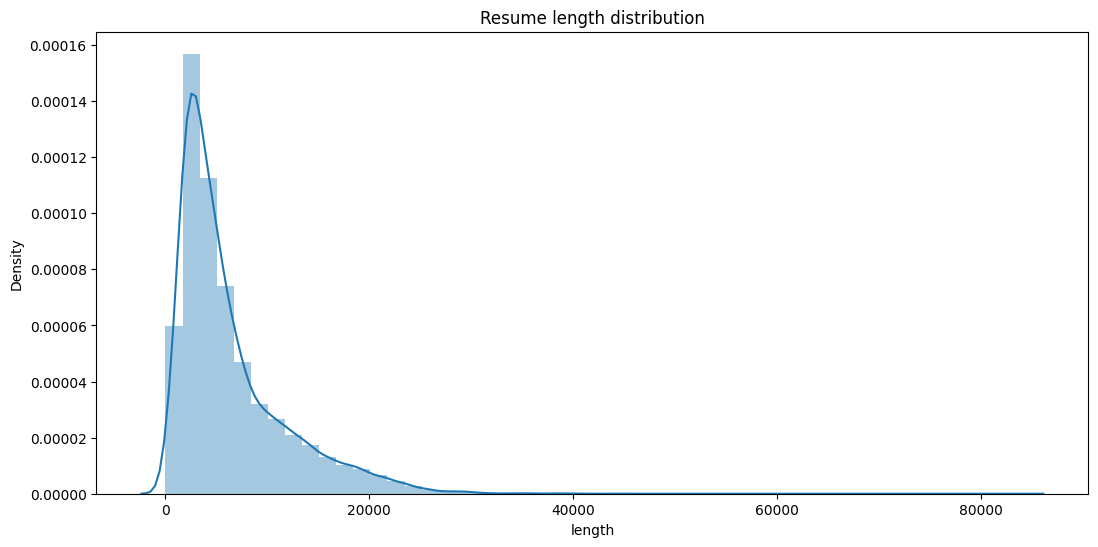

In [50]:
plt.figure(figsize=(12.8,6))
sns.distplot(df['length']).set_title('Resume length distribution')

In [27]:
df['instruction'].value_counts()

instruction
Web Developer                3466
Java Developer               2502
Python Developer             2359
Testing                        70
DevOps Engineer                55
Web Designing                  45
Blockchain                     40
Data Science                   40
Database                       33
DotNet Developer               28
Network Security Engineer      25
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='instruction'>

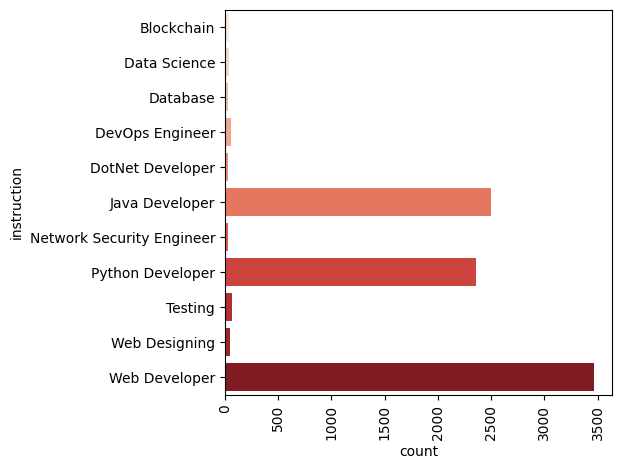

In [28]:
plt.figure(figsize=(5,5))
plt.xticks(rotation=90)
sns.countplot(y="instruction", data=df, palette='Reds')

In [29]:
# Reemplaza 'instruccion' con el nombre de tu columna
# Reemplaza 'etiqueta' con la etiqueta que quieres contar
conteo_etiquetas = df['instruction'].value_counts().get('Generate a Resume for a DotNet Developer Job', 0)

print(f"La etiqueta aparece {conteo_etiquetas} veces")

La etiqueta aparece 0 veces


In [54]:
df['instruction'] = df['instruction'].str.replace('Generate a Resume for a ', '')
df['instruction'] = df['instruction'].str.split('Job').str[0]

df.reset_index(drop=True, inplace=True)

df['instruction']

0        Automation Testing 
1        Automation Testing 
2        Automation Testing 
3        Automation Testing 
4        Automation Testing 
                ...         
14761         Web Developer 
14762         Web Developer 
14763         Web Developer 
14764         Web Developer 
14765         Web Developer 
Name: instruction, Length: 14766, dtype: object

In [55]:
df.to_csv('updated_data_final_cleaned2.csv', index=False)


Empece desde aqui porque ya las etiquetas estaban cortadas a lo que necesitabamos xd

In [8]:
data_1 = pd.read_csv('Dataset_part_pp.csv', encoding="utf-8")
data_2 = pd.read_csv('Dataset_part_JT.csv', encoding="utf-8")

data_1.head()


#data_1.rename(columns={'Resume_test': 'Resume'}, inplace=True)

#data_1.rename(columns={'instruction': 'Category'}, inplace=True)

print(data_1.info())

print(data_2.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5197 entries, 0 to 5196
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Category       5197 non-null   object
 1   Clean_Resume   5197 non-null   object
 2   Common Skills  5197 non-null   object
dtypes: object(3)
memory usage: 121.9+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  550 non-null    object
 1   Resume    550 non-null    object
dtypes: object(2)
memory usage: 8.7+ KB
None


In [4]:
# Verifica si hay valores nulos en el dataset
nulos_en_dataset = data_2.isnull().any().any()

# Mostrará True si hay al menos un valor nulo en el dataset, de lo contrario mostrará False
print(nulos_en_dataset)


# Si quieres obtener más detalles, como la cantidad de valores nulos por columna, puedes hacer lo siguiente:
nulos_por_columna = data_2.isnull().sum()
print(nulos_por_columna)

False
Category         0
Clean_Resume     0
Common Skills    0
dtype: int64


In [5]:
print(data_1.shape)
print(data_1.columns)
print(data_1.Category.value_counts())


(5197, 3)
Index(['Category', 'Clean_Resume', 'Common Skills'], dtype='object')
Category
Java Developer               2502
Python Developer             2359
Testing                        70
DevOps Engineer                55
Web Designing                  45
Blockchain                     40
Data Science                   40
Database                       33
DotNet Developer               28
Network Security Engineer      25
Name: count, dtype: int64


In [6]:

print(data_2.shape)
print(data_2.columns)
print(data_2.Category.value_counts())


(5197, 3)
Index(['Category', 'Clean_Resume', 'Common Skills'], dtype='object')
Category
Java Developer               2502
Python Developer             2359
Testing                        70
DevOps Engineer                55
Web Designing                  45
Blockchain                     40
Data Science                   40
Database                       33
DotNet Developer               28
Network Security Engineer      25
Name: count, dtype: int64


In [60]:
rows_to_add = data_2.shape[0] - data_1.shape[0]

additional_rows = pd.DataFrame(index=range(rows_to_add), columns=data_2.columns)

df2_aligned = pd.concat([additional_rows, data_2], ignore_index=True)

result = pd.concat([data_1, df2_aligned], axis=0)

result.drop(result.columns[result.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)



In [61]:
# Verifica si hay valores nulos en el dataset
nulos_en_dataset = result.isnull().any().any()

# Mostrará True si hay al menos un valor nulo en el dataset, de lo contrario mostrará False
print(nulos_en_dataset)


# Si quieres obtener más detalles, como la cantidad de valores nulos por columna, puedes hacer lo siguiente:
nulos_por_columna = result.isnull().sum()
print(nulos_por_columna)

True
Category        0
Resume          0
length      11024
dtype: int64


In [62]:
print(result.shape)
print(result.columns)
print(result.Category.value_counts())


(25790, 3)
Index(['Category', 'Resume', 'length'], dtype='object')
Category
Project manager               3527
Web Developer                 3466
Java Developer                2502
Python Developer              2359
Security Analyst              2259
Testing                       1120
Java Developer                 924
DevOps Engineer                660
Python Developer               559
Blockchain                     540
Hadoop                         504
ETL Developer                  480
Web Designing                  450
Operations Manager             440
HR                             440
Sales                          400
Mechanical Engineer            400
Data Science                   400
Database                       396
PMO                            360
Arts                           360
DotNet Developer               336
Electrical Engineering         330
Business Analyst               308
Health and fitness             303
Network Security Engineer      300
Automation Tes

In [63]:
print(result.shape)
print(result.columns)
print(result.Category.value_counts())


(25790, 3)
Index(['Category', 'Resume', 'length'], dtype='object')
Category
Project manager               3527
Web Developer                 3466
Java Developer                2502
Python Developer              2359
Security Analyst              2259
Testing                       1120
Java Developer                 924
DevOps Engineer                660
Python Developer               559
Blockchain                     540
Hadoop                         504
ETL Developer                  480
Web Designing                  450
Operations Manager             440
HR                             440
Sales                          400
Mechanical Engineer            400
Data Science                   400
Database                       396
PMO                            360
Arts                           360
DotNet Developer               336
Electrical Engineering         330
Business Analyst               308
Health and fitness             303
Network Security Engineer      300
Automation Tes

In [64]:
result['Category'] = result['Category'].str.strip()

In [65]:


#eliminar valores
valores_a_eliminar = ['HR','Advocate','Arts','Sales','Mechanical Engineer', 'Health and fitness','Civil Engineer', 'Business Analyst', 'Electrical Engineering', 'Operations Manager', 'PMO',"SAP Developer", "Automation Testing"]
result = result[~result['Category'].isin(valores_a_eliminar)]

result["Category"].unique()

array(['Blockchain', 'Data Science', 'Database', 'Designer',
       'DevOps Engineer', 'DotNet Developer', 'ETL Developer',
       'Information Technology', 'Java Developer',
       'Network Security Engineer', 'Project manager', 'Python Developer',
       'Security Analyst', 'Testing', 'Web Designing', 'Web Developer',
       'Hadoop'], dtype=object)

In [66]:
#eliminar valores
valores_a_eliminar = ['SAP Developer ', 'Designer', 'Automation Testing','Project manager', 'SAP Developer', 'Security Analyst','ETL Developer','Hadoop','Web Developer']
df = result[~result['Category'].isin(valores_a_eliminar)]

df["Category"].unique()



array(['Blockchain', 'Data Science', 'Database', 'DevOps Engineer',
       'DotNet Developer', 'Information Technology', 'Java Developer',
       'Network Security Engineer', 'Python Developer', 'Testing',
       'Web Designing'], dtype=object)

In [67]:
print(df.shape)
print(df.columns)
print(df.Category.value_counts())

(11002, 3)
Index(['Category', 'Resume', 'length'], dtype='object')
Category
Java Developer               3426
Python Developer             2918
Testing                      1190
DevOps Engineer               715
Blockchain                    580
Web Designing                 495
Data Science                  440
Database                      429
DotNet Developer              364
Network Security Engineer     325
Information Technology        120
Name: count, dtype: int64


In [68]:
#reducir las etiquetas a 1200
def sample_n(df, n=1300):
    return df.sample(min(len(df), n))

df = df.groupby('Category').apply(sample_n).reset_index(drop=True)

In [69]:
print(df.shape)
print(df.columns)
print(df.Category.value_counts())

(7258, 3)
Index(['Category', 'Resume', 'length'], dtype='object')
Category
Java Developer               1300
Python Developer             1300
Testing                      1190
DevOps Engineer               715
Blockchain                    580
Web Designing                 495
Data Science                  440
Database                      429
DotNet Developer              364
Network Security Engineer     325
Information Technology        120
Name: count, dtype: int64


<Axes: xlabel='count', ylabel='Category'>

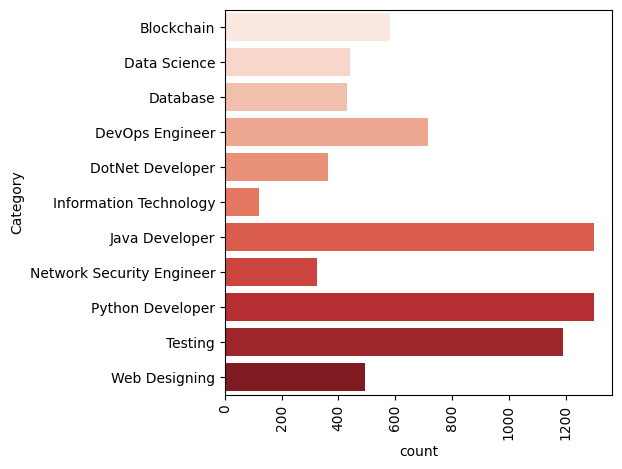

In [70]:
plt.figure(figsize=(5,5))
plt.xticks(rotation=90)
sns.countplot(y="Category", data=df, palette='Reds')

In [71]:
df.to_csv('updated_data_final_cleaned3.csv', index=False)
#FALTA CONCACTENAR LOS DATOS Y CHECAR COMO QUEDARIAN ANTES DE UNIRLOS